<a href="https://colab.research.google.com/github/BernardoRMendes/Projeto/blob/main/Download_CSV_Cotacoes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
!pip install yahooquery
from yahooquery import Ticker
import pandas as pd
from google.colab import files
import datetime

     |████████████████████████████████| 51kB 3.8MB/s 
     |████████████████████████████████| 6.3MB 22.6MB/s 
     |████████████████████████████████| 81kB 6.6MB/s 
  Created wheel for requests-futures: filename=requests_futures-1.0.0-cp37-none-any.whl size=7028 sha256=5316ade9b8574895a071d705daaa99f0ae03a33276f6246165d93b590a1cfffc
  Stored in directory: /root/.cache/pip/wheels/26/d0/f5/dc4e4a37bbe55c9acf967d2bd899152412c1e49c227f5395ff
Successfully built requests-futures
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
  Found existing installation: tqdm 4.41.1
    Uninstalling tqdm-4.41.1:
      Successfully uninstalled tqdm-4.41.1


**Nesse script, vamos fazer o download das cotações de ativos financeiros e compactar em um arquivo zip, integrando o Yahoo Finance com o Google Colab. As aplicações são inúmeras. No meu caso, uso esse arquivo para alimentar o RRG Desktop diariamente.**

**Primeiro definiremos a lista dos tickers utilizados. Em geral, para ativos brasileiros o yahoo requer o ".SA" ao final de cada ticker. Portanto, uma forma prática de construir a lista é baixar os tickers diretamente do site da b3, e depois concatenar o .SA no excel.**

**No exemplo a seguir, baixei os dados do Índice Brasil Amplo BM&FBOVESPA (IBrA B3), adicionando o código do benchmark ("BOVA11.SA") ao final da lista.**

http://www.b3.com.br/pt_br/market-data-e-indices/indices/indices-amplos/indice-brasil-amplo-ibra-composicao-da-carteira.htm

Saving foto1.png to foto1.png


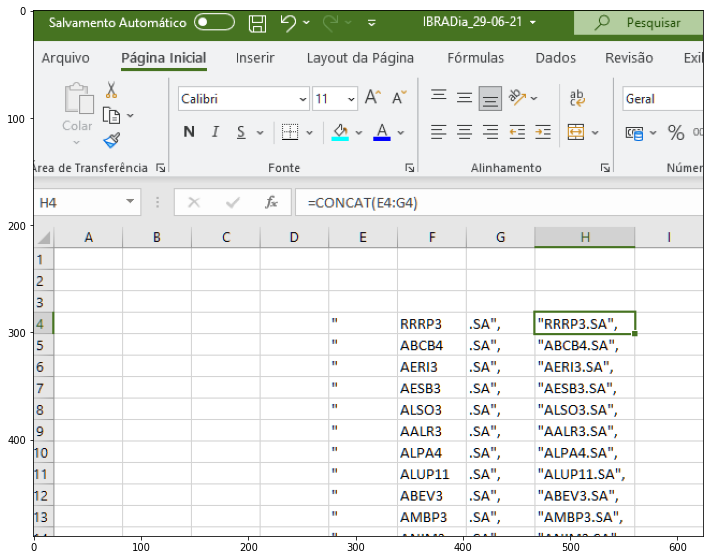

In [2]:
import cv2
from matplotlib import pyplot as plt
uploaded = files.upload()
img = cv2.imread("foto1.png")
plt.figure(figsize = (12,12))
plt.imshow(img)
plt.show()

In [3]:
lista=["RRRP3.SA",	"ABCB4.SA",	"AERI3.SA",	"AESB3.SA",	"ALSO3.SA",	"AALR3.SA",	"ALPA4.SA",	"ALUP11.SA",	"ABEV3.SA",	"AMBP3.SA",	"ANIM3.SA",	"ARZZ3.SA",	"ASAI3.SA",	"AZUL4.SA",	"BTOW3.SA",	"B3SA3.SA",	"BMGB4.SA",	"BIDI4.SA",	"BIDI11.SA",	"BPAN4.SA",	"BRSR6.SA",	"BBSE3.SA",	"BKBR3.SA",	"BRML3.SA",	"BRPR3.SA",	"BBDC3.SA",	"BBDC4.SA",	"BRAP4.SA",	"BBAS3.SA",	"AGRO3.SA",	"BRKM5.SA",	"BRFS3.SA",	"BPAC11.SA",	"CAML3.SA",	"CRFB3.SA",	"CCRO3.SA",	"CEAB3.SA",	"CMIG3.SA",	"CMIG4.SA",	"CESP6.SA",	"HGTX3.SA",	"CIEL3.SA",	"COGN3.SA",	"CSMG3.SA",	"CPLE3.SA",	"CPLE6.SA",	"CSAN3.SA",	"CPFE3.SA",	"CURY3.SA",	"CVCB3.SA",	"CYRE3.SA",	"PNVL3.SA",	"DIRR3.SA",	"DTEX3.SA",	"ECOR3.SA",	"ELET3.SA",	"ELET6.SA",	"EMBR3.SA",	"ENAT3.SA",	"ENBR3.SA",	"ENGI11.SA",	"ENEV3.SA",	"EGIE3.SA",	"ENJU3.SA",	"EQTL3.SA",	"EVEN3.SA",	"EZTC3.SA",	"FESA4.SA",	"FLRY3.SA",	"GFSA3.SA",	"GGBR4.SA",	"GOAU4.SA",	"GOLL4.SA",	"GRND3.SA",	"GMAT3.SA",	"NTCO3.SA",	"SBFG3.SA",	"SOMA3.SA",	"GUAR3.SA",	"HAPV3.SA",	"HBOR3.SA",	"HBSA3.SA",	"HYPE3.SA",	"IGTA3.SA",	"PARD3.SA",	"MEAL3.SA",	"ROMI3.SA",	"GNDI3.SA",	"MYPK3.SA",	"RANI3.SA",	"IRBR3.SA",	"ITSA4.SA",	"ITUB3.SA",	"ITUB4.SA",	"JBSS3.SA",	"JPSA3.SA",	"JHSF3.SA",	"KLBN11.SA",	"LAVV3.SA",	"LIGT3.SA",	"LINX3.SA",	"RENT3.SA",	"LCAM3.SA",	"LWSA3.SA",	"LOGG3.SA",	"LOGN3.SA",	"LAME3.SA",	"LAME4.SA",	"AMAR3.SA",	"LREN3.SA",	"LPSB3.SA",	"MDIA3.SA",	"MGLU3.SA",	"POMO4.SA",	"MRFG3.SA",	"CASH3.SA",	"LEVE3.SA",	"MILS3.SA",	"BEEF3.SA",	"MTRE3.SA",	"MOVI3.SA",	"MRVE3.SA",	"MULT3.SA",	"NEOE3.SA",	"NGRD3.SA",	"ODPV3.SA",	"OMGE3.SA",	"PCAR3.SA",	"PETR3.SA",	"PETR4.SA",	"BRDT3.SA",	"PRIO3.SA",	"PETZ3.SA",	"PSSA3.SA",	"PTBL3.SA",	"POSI3.SA",	"QUAL3.SA",	"LJQQ3.SA",	"RADL3.SA",	"RAPT4.SA",	"RCSL4.SA",	"RDOR3.SA",	"RAIL3.SA",	"SBSP3.SA",	"SAPR4.SA",	"SAPR11.SA",	"SANB11.SA",	"STBP3.SA",	"SMTO3.SA",	"SEQL3.SA",	"SEER3.SA",	"CSNA3.SA",	"SIMH3.SA",	"SQIA3.SA",	"SLCE3.SA",	"SULA11.SA",	"SUZB3.SA",	"TAEE11.SA",	"TASA4.SA",	"TCSA3.SA",	"TGMA3.SA",	"VIVT3.SA",	"TEND3.SA",	"TIMS3.SA",	"TOTS3.SA",	"TRPL4.SA",	"TRIS3.SA",	"TUPY3.SA",	"UGPA3.SA",	"UNIP6.SA",	"USIM5.SA",	"VALE3.SA",	"VLID3.SA",	"VVAR3.SA",	"VIVA3.SA",	"VULC3.SA",	"WEGE3.SA",	"WIZS3.SA",	"YDUQ3.SA","BOVA11.SA"]

**Verificando o diretório:**

In [4]:
!pwd

/content


**Criando uma pasta para armazenar os arquivos CSV:**

In [5]:
!mkdir RRG

**Indo para a Pasta criada:**

In [6]:
cd RRG/

/content/RRG


**Para cada elemento da lista de ativos, carregue o Ticker, escolha o período histórico (period='2y' para retornar a cotação dos últimos dois anos) e também a periodicidade (interval='1d' para dados diários). Selecionamos apenas os dados de fechamento, dropamos um índice desnecessário do dataframe e ajustamos as datas com o comando "df.index.values.astype("datetime64[D]")". Por fim, o dataframe é convertido para um arquivo csv com o nome "Codigo.csv".**

In [7]:
i=np.arange(len(lista))
for i in i:
  try:
    a=Ticker(lista[i])
    df=a.history(period='2y',interval='1d')
    df=df['adjclose']
    df=df.droplevel("symbol")
    df.index.values.astype("datetime64[D]")
    df.to_csv(str(lista[i])+".csv")
  except:
    pass

**No canto esquerdo do seu Colab, clique no ícone com uma Pasta e vá ao diretório "content". Dentro dele, deverá conter uma pasta com o nome "RRG" e os arquivos csv.**

Saving foto2.png to foto2.png


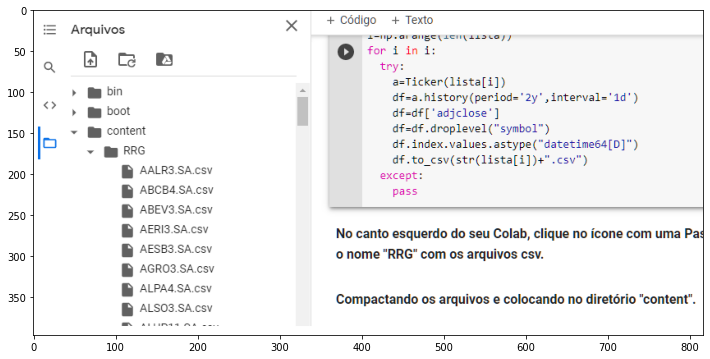

In [8]:
uploaded = files.upload()
img = cv2.imread("foto2.png")
plt.figure(figsize = (12,12))
plt.imshow(img)
plt.show()

**Compactando os arquivos e colocando no diretório "content".**

In [9]:
!zip -r /content/RRG.zip /content/RRG/

  adding: content/RRG/ (stored 0%)
  adding: content/RRG/SAPR11.SA.csv (deflated 65%)
  adding: content/RRG/NTCO3.SA.csv (deflated 74%)
  adding: content/RRG/TEND3.SA.csv (deflated 63%)
  adding: content/RRG/SOMA3.SA.csv (deflated 78%)
  adding: content/RRG/MULT3.SA.csv (deflated 66%)
  adding: content/RRG/LEVE3.SA.csv (deflated 65%)
  adding: content/RRG/BRML3.SA.csv (deflated 79%)
  adding: content/RRG/RENT3.SA.csv (deflated 62%)
  adding: content/RRG/MYPK3.SA.csv (deflated 73%)
  adding: content/RRG/TASA4.SA.csv (deflated 78%)
  adding: content/RRG/BRFS3.SA.csv (deflated 78%)
  adding: content/RRG/GRND3.SA.csv (deflated 65%)
  adding: content/RRG/LOGN3.SA.csv (deflated 79%)
  adding: content/RRG/USIM5.SA.csv (deflated 63%)
  adding: content/RRG/IGTA3.SA.csv (deflated 64%)
  adding: content/RRG/CIEL3.SA.csv (deflated 67%)
  adding: content/RRG/B3SA3.SA.csv (deflated 63%)
  adding: content/RRG/MDIA3.SA.csv (deflated 63%)
  adding: content/RRG/GOAU4.SA.csv (deflated 63%)
  adding: cont

**Fazendo o download para a máquina local:**

In [10]:
files.download("/content/RRG.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Caso o download falhe por algum motivo, basta clicar com o botão direito no arquivo "RRG.zip" e selecionar a opção de "Fazer download".**

Saving foto3.png to foto3.png


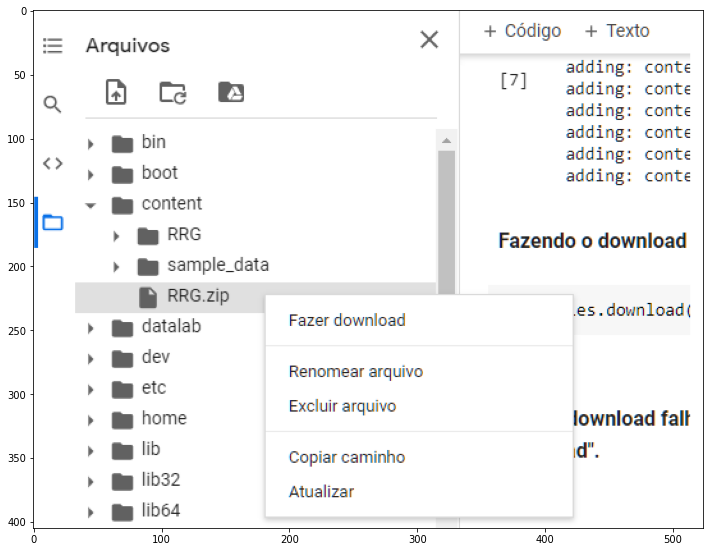

In [11]:
uploaded = files.upload()
img = cv2.imread("foto3.png")
plt.figure(figsize = (12,12))
plt.imshow(img)
plt.show()